### Objective
Bob has started his own mobile company. He wants to give a tough fight to big companies like Apple, Samsung etc.
He does not know how to estimate the price of mobiles his company creates. In this competitive mobile phone market, you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.
Bob wants to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.
In this problem you do not have to predict the actual price but a price range indicating how high the price is.


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import accuracy_score

In [2]:
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset
data = pd.read_csv('datasets_11167_15520_train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
data.head(10) #display the first 10 rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [5]:
data.tail(10) #display the last 10 rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
data.shape # Dimensions of the table

(2000, 21)

# Exploratory Data Analysis

In [7]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#### Insights:
* This is a numerical data all the datatypes of features are int and float datatype 

Task 2:- Prepare a complete data analysis report on the given data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Insights:
* Here standard deviation is not 0 anywhere
* There are no 0 values for ths feature

# To check linearity

In [9]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

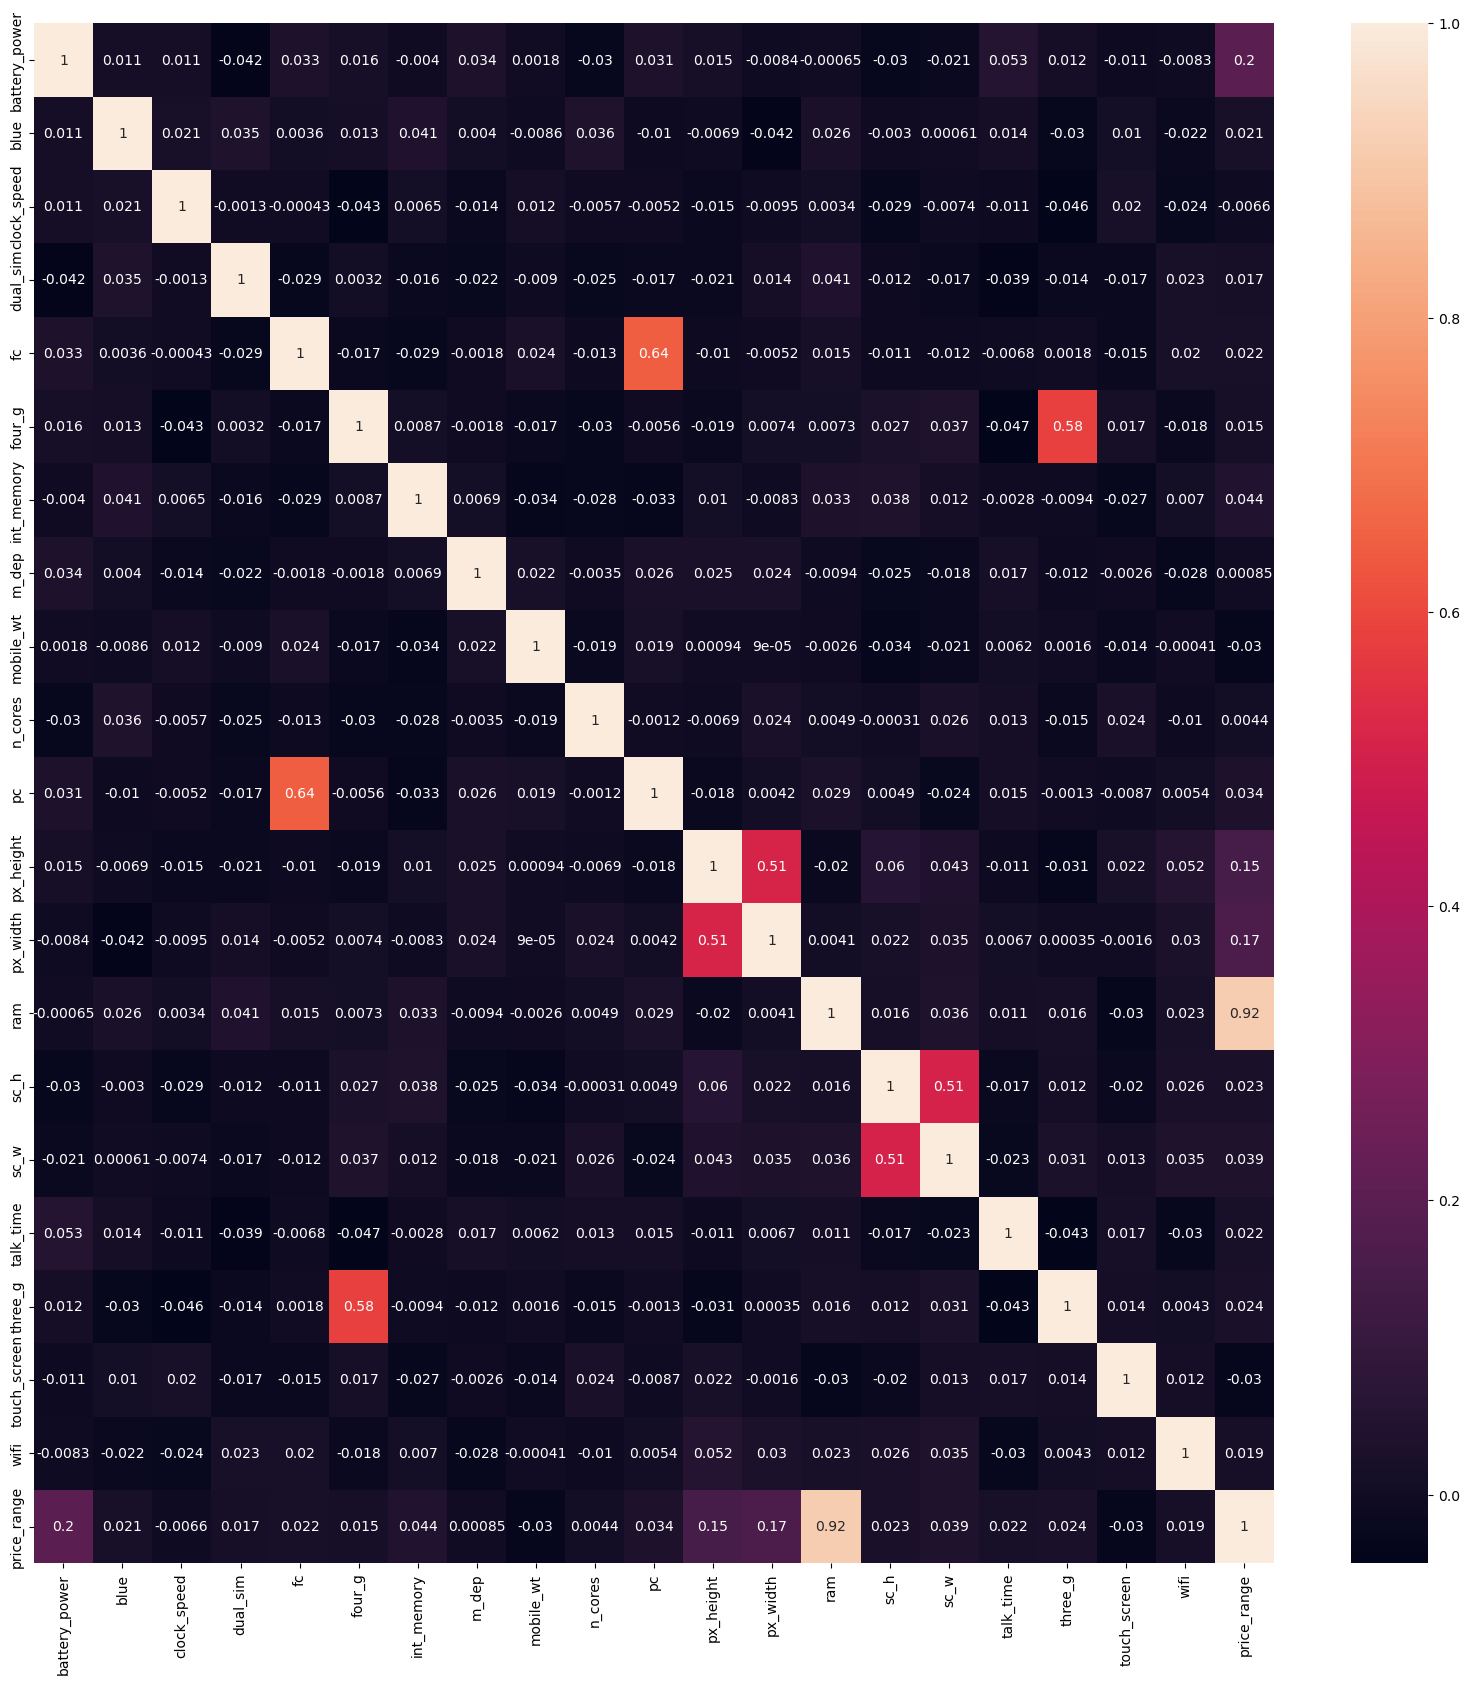

In [10]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot=True) #plot the heatmap for analysis of data

In [11]:
price = data.iloc[19]
price

battery_power     682.0
blue                1.0
clock_speed         0.5
dual_sim            0.0
fc                  4.0
four_g              0.0
int_memory         19.0
m_dep               1.0
mobile_wt         121.0
n_cores             4.0
pc                 11.0
px_height         902.0
px_width         1064.0
ram              2337.0
sc_h               11.0
sc_w                1.0
talk_time          18.0
three_g             0.0
touch_screen        1.0
wifi                1.0
price_range         1.0
Name: 19, dtype: float64

In [12]:
data.columns #used to find the name of the columns in the dataset

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

<Axes: ylabel='Density'>

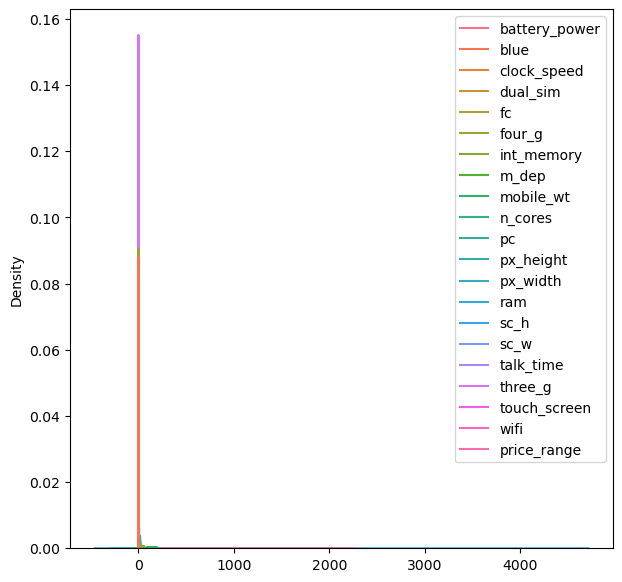

In [13]:
plt.figure(figsize=(7,7))
sns.kdeplot(data) #Kernel Density plot is used to estimate the Probability Density Function of an Independent Variable.

# To find Variance Inflation Factor (VIF)
- Variance Inflation Factor is used to measure Multicollinearity in Regression Analysis
- Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated, which can lead to inaccurate estimates of the regression coefficients and reduced interpretability of the model.
- A high VIF value (typically greater than 10) indicates that the predictor variable is highly correlated with other variables in the model, suggesting multicollinearity. 

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_list = []
for i in range(data.shape[1] -1):
    vif = variance_inflation_factor(data.to_numpy(),i)
    print(f"VIF of {data.columns[i]} >> ",vif)
    vif_list.append(vif)

VIF of battery_power >>  9.852328508426966
VIF of blue >>  1.9876430251855033
VIF of clock_speed >>  4.353408864919295
VIF of dual_sim >>  2.0388227478042706
VIF of fc >>  3.4136469696878677
VIF of four_g >>  3.1943644513642933
VIF of int_memory >>  3.9794061959211238
VIF of m_dep >>  3.9526335753640316
VIF of mobile_wt >>  14.70982597548003
VIF of n_cores >>  4.707756818403933
VIF of pc >>  6.25127399457971
VIF of px_height >>  4.626185339561303
VIF of px_width >>  12.018344869997854
VIF of ram >>  39.80644997957948
VIF of sc_h >>  11.817053848157617
VIF of sc_w >>  3.72193341248694
VIF of talk_time >>  4.916936243461045
VIF of three_g >>  6.219107624486707
VIF of touch_screen >>  2.0001082279599567
VIF of wifi >>  2.03579620929709


## Insights:
- When VIF or tolerance is equal to 1, the ith independent variable is not correlated to the remaining ones, meaning that multicollinearity does not exist.

In general terms,
* VIF equal to 1 = variables are not correlated
* VIF between 1 and 5 = variables are moderately correlated 
* VIF greater than 5 = variables are highly correlated

- The higher the VIF, the higher the possibility that multicollinearity exists, and further research is required.
- When VIF is higher than 10, there is significant multicollinearity that needs to be corrected.

In [15]:
x = data.drop("price_range", axis = 1)
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

<Axes: >

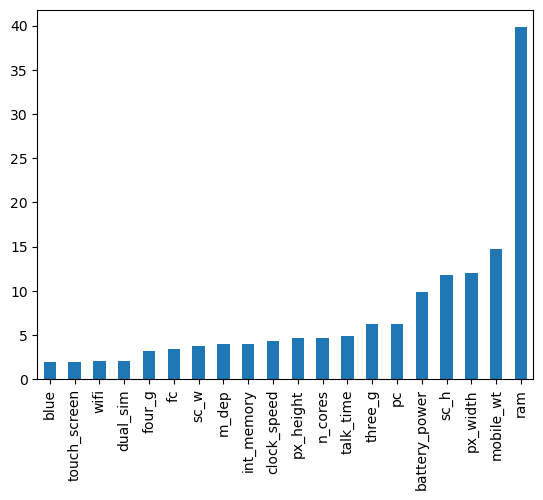

In [16]:
s1 = pd.Series(vif_list, index = x.columns)
s1.sort_values().plot(kind = "bar")

<Axes: >

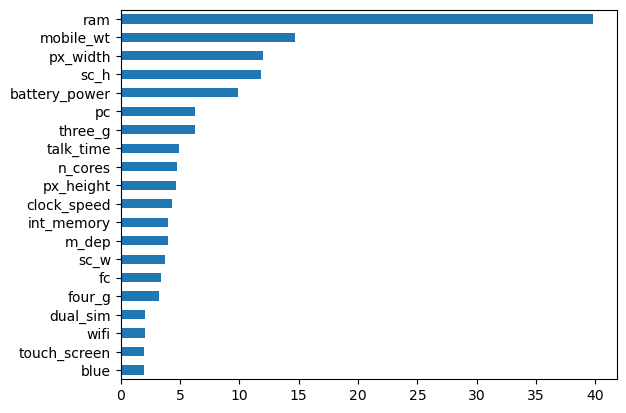

In [17]:
s1.sort_values().plot(kind = "barh")

# Univariate Analysis
- Univariate analysis explores each value in a dataset, separately.
- Here, we are using Sweetviz to generate the report.

In [18]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Insights:
* There are many features have the distinct values which is 0 & 1
* for battery_power total max energy is 1998 and min can store is 501 in mAh
* for bluetooth there are most are the mobiles does not(0) have the bluetooth actually it's a 50%(yes) - 50%(not)
* for dual_sim there are max supports(1) the dual sims
* front camera is completely in right skewed form
* for 4g most of are the 4g(1)
* Internal memory is max 64.0 and min 2.0
* mobile weight is max 200 and min 80
* pixel camera is max 20.0, height and weight is max nearly 2k
* ram is max 3998 and min 256 which is good
* talk time is max 20.0 will last 
* for 3g yes(1) max its 3g
* for touch screen its 50%(yes) - 50%(no)
* max mobiles have(1) wifi
* for price range which is target variable, 0(low cost)-25%, 1(medium cost)=25%, 2(high cost)=25% and 3(very high cost)=25%.

# Bivariate Analysis

### Relation between Price_range & Battery_power
#### Insights:
* price_range 3 has the good battery_power, we can say that they are costlier having a max battery_power.
* price_range 0 has lower battery_power as compare to others

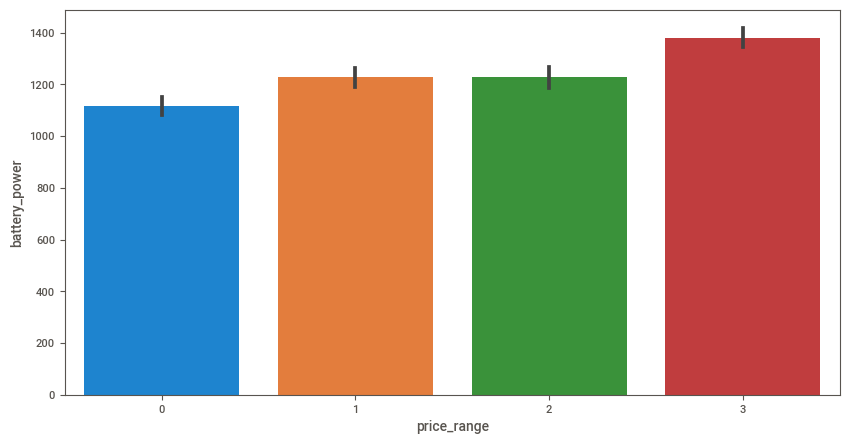

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='price_range',y='battery_power')
plt.show()

### Relation between Price_range and Pixel height
#### Insights:
* pixel_height above the 700 having price_range more
* price_range 0 having the lower px_height which is below 550

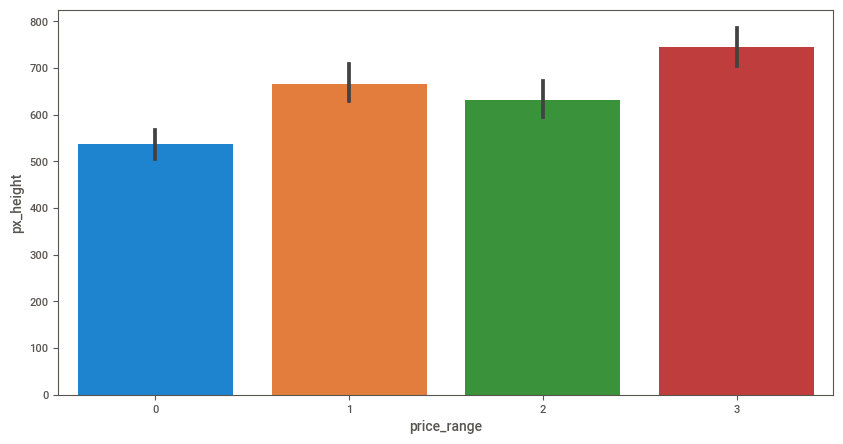

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='price_range',y='px_height')
plt.show()

### Relation between Price_range and Ram
#### Insights:
* The max px_width have the more price_range
* And below 1200 px_width have the 0 price_range

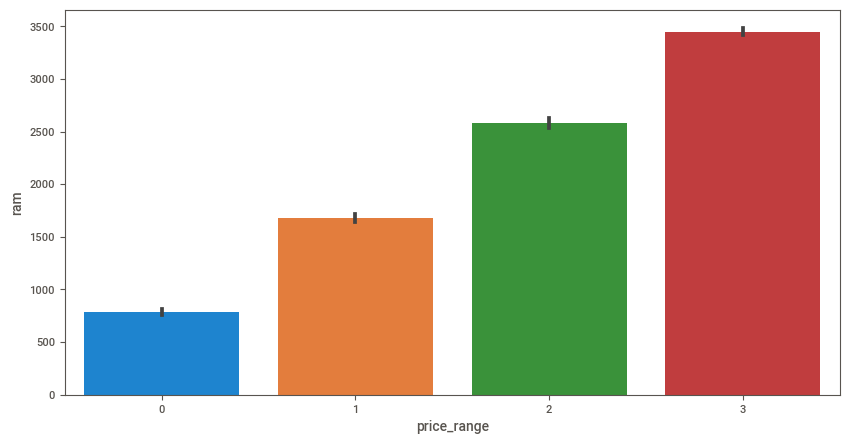

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='price_range',y='ram')
plt.show()

### Relation between Price_range and 3G
#### Insights:
* We can see here, there are three_g mobiles max(1) have and in that 2nd price_range have max three_g facilities
* we can assume that four_g mobiles used 3rd price_range more

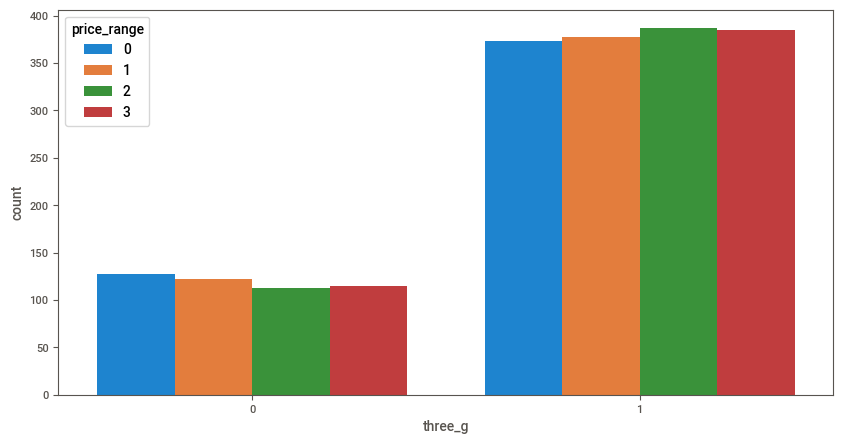

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='three_g',hue='price_range')
plt.show()

### Relation between price range and memory
#### Insights:
* mobiles does not(0) having mobile dual_sims have good int_memory and there price_range is also more
* mobiles having(1) dual_sims have bad int_memory but there price_range is also in 3rd category

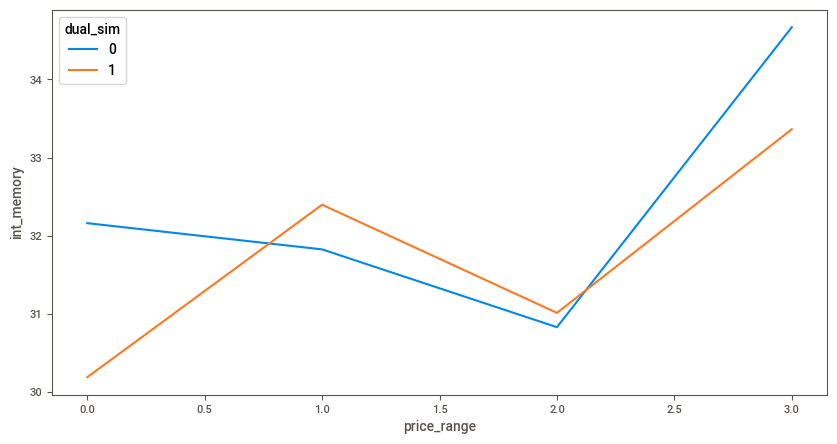

In [23]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data,x='price_range',y="int_memory",hue='dual_sim',ci=None)
plt.show()

# Multivariate Analysis

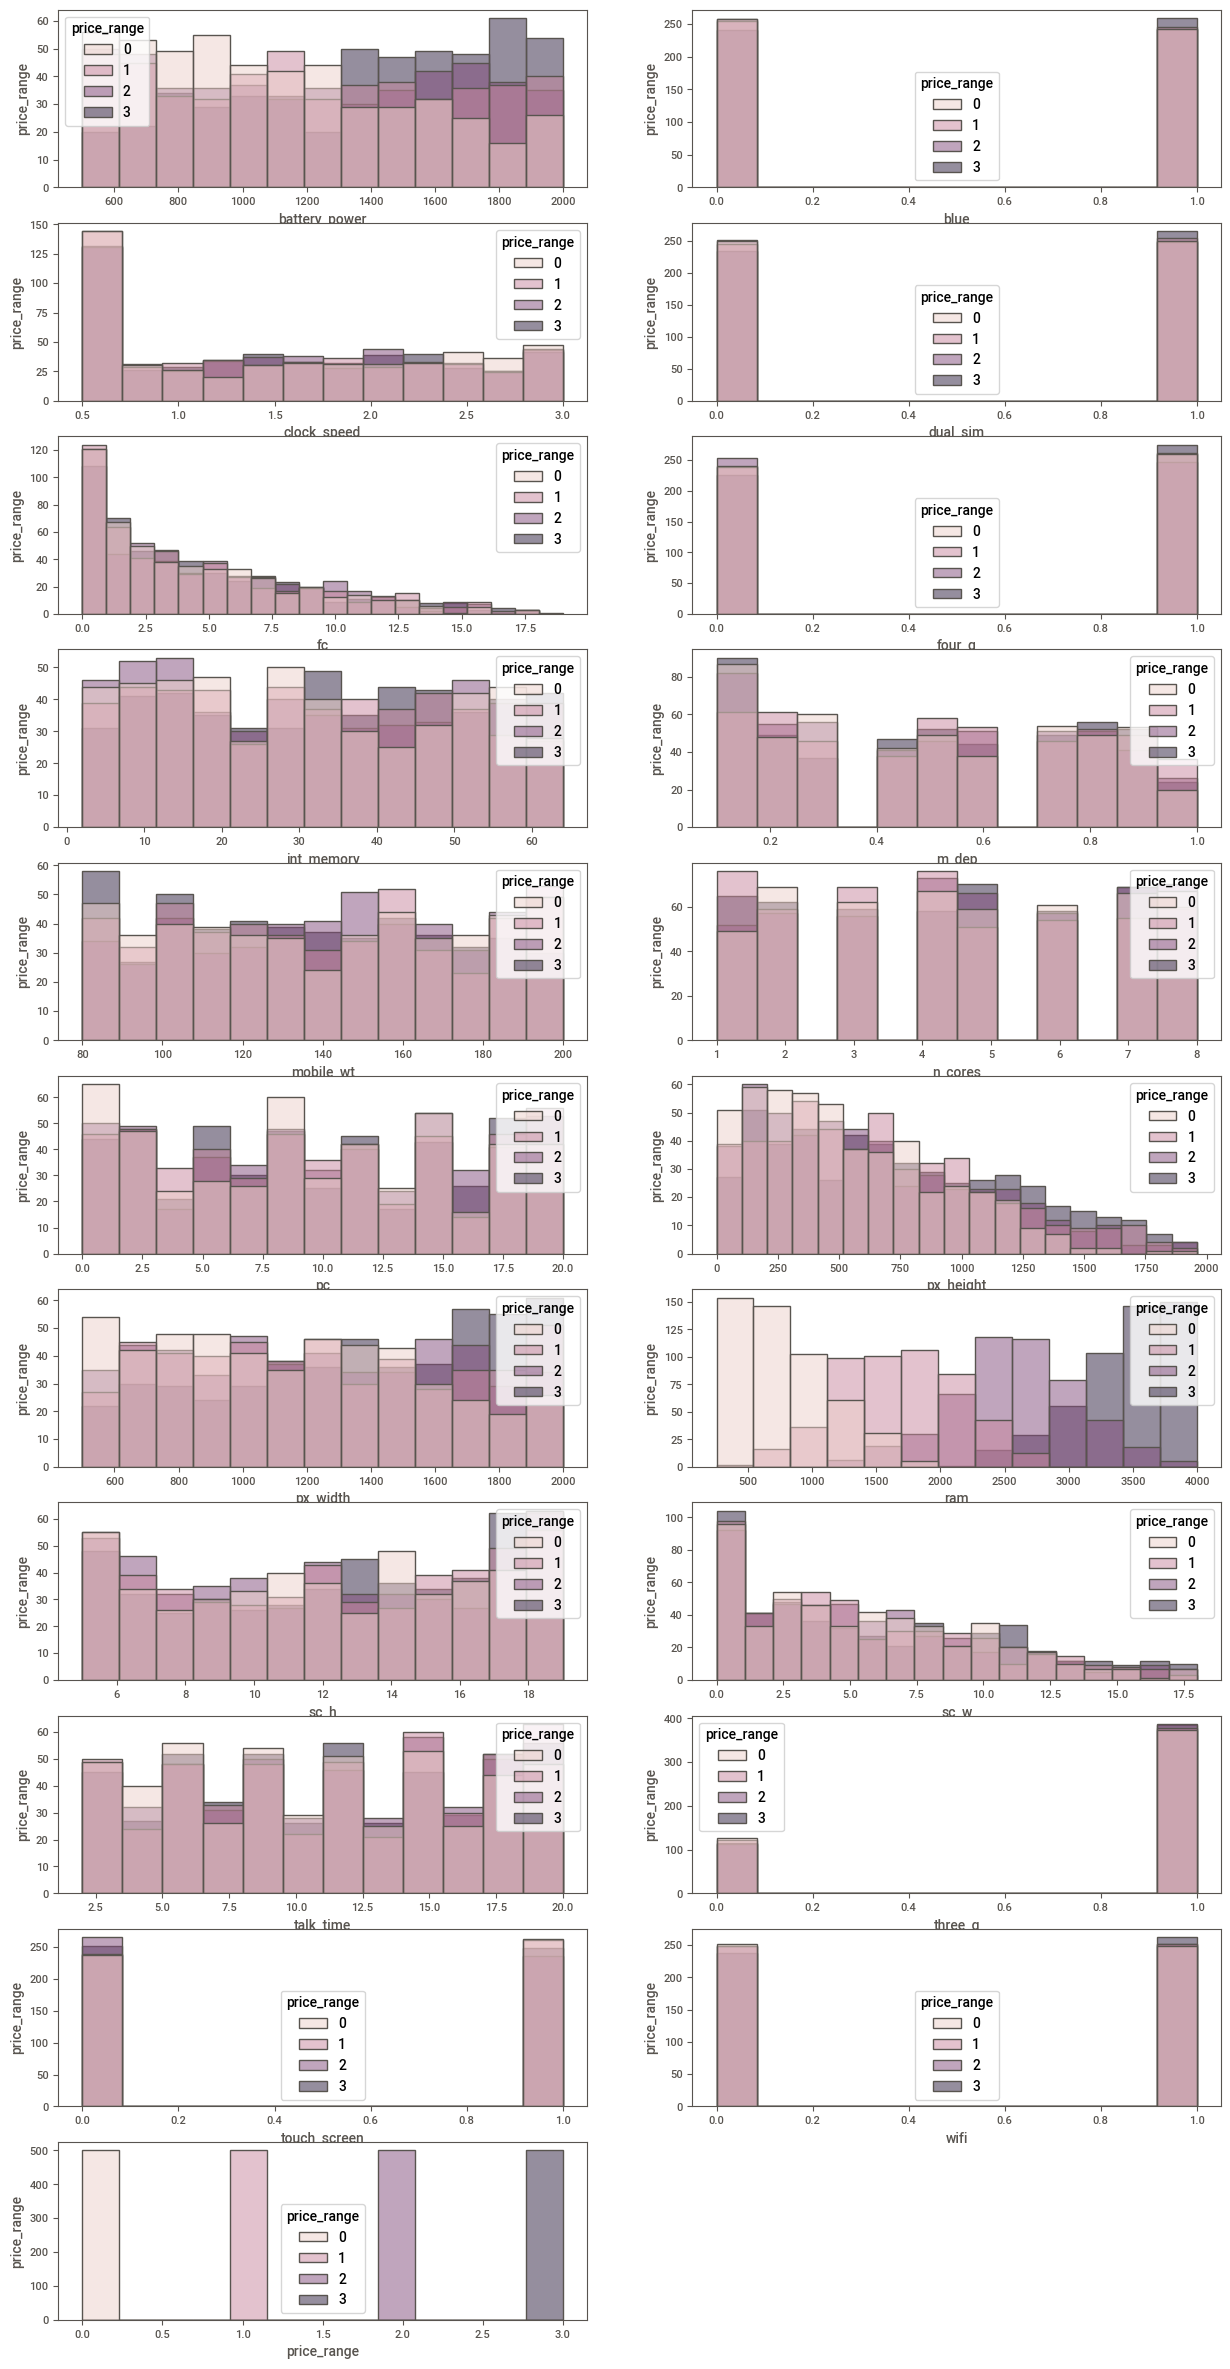

In [24]:
plt.figure(figsize=(15, 30), facecolor= 'white')
plotnumber =1

for column in data.columns:
  plotnumber<=22
  ax=plt.subplot(11,2,plotnumber)
  sns.histplot(x=data[column], hue =data['price_range'])
  plt.xlabel(column, fontsize=10)
  plt.ylabel('price_range', fontsize=10)
  plotnumber+=1
plt.show()

### Individual Plot

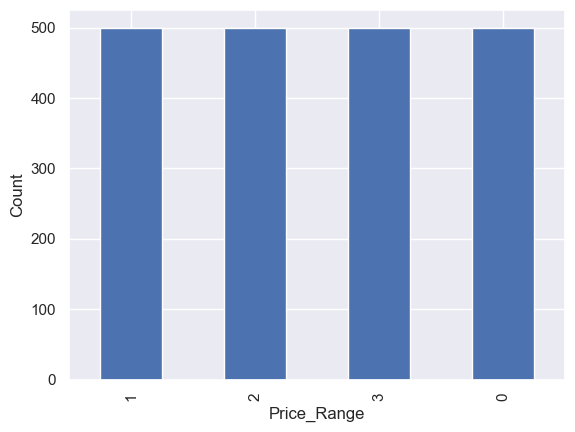

In [25]:
sns.set()
price_plot = data['price_range'].value_counts().plot(kind='bar')
plt.xlabel('Price_Range')
plt.ylabel('Count')
plt.show()

#### Insight:
- There are 4 different price_range values and the elements in it are almost same.

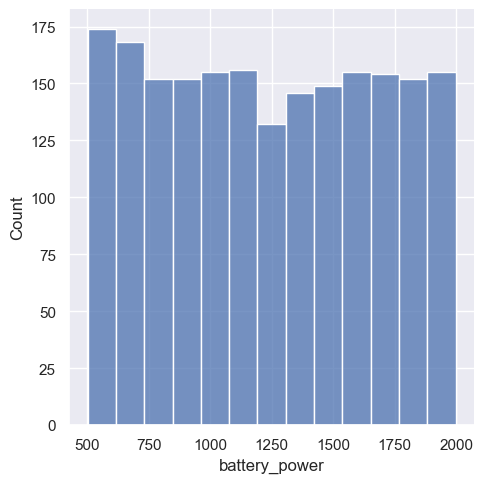

In [26]:
# Battery Power
ax=sns.displot(data["battery_power"])
plt.show()

#### Insight:
- We can how the battery mAh is spread.

<Axes: xlabel='blue', ylabel='price_range'>

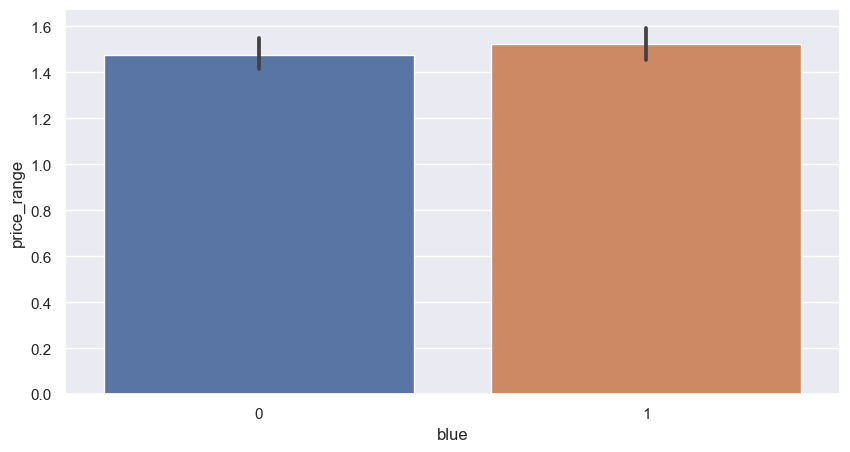

In [27]:
# Bluetooth
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(data, x='blue', y='price_range', ax=ax)

#### Insight:
- From this plot, we can see the half of the devices have bluetooth and half don't

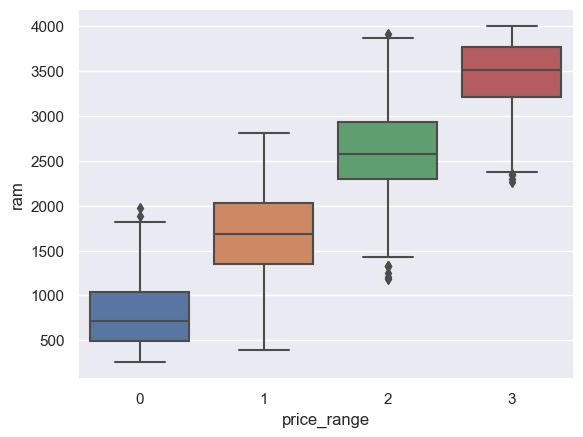

In [28]:
# ram
sns.boxplot(data,x='price_range',y='ram')
plt.show()

#### Insights:
- The higher the price of the mobile phone, the greater the ram capacity.

<Axes: xlabel='px_width', ylabel='Density'>

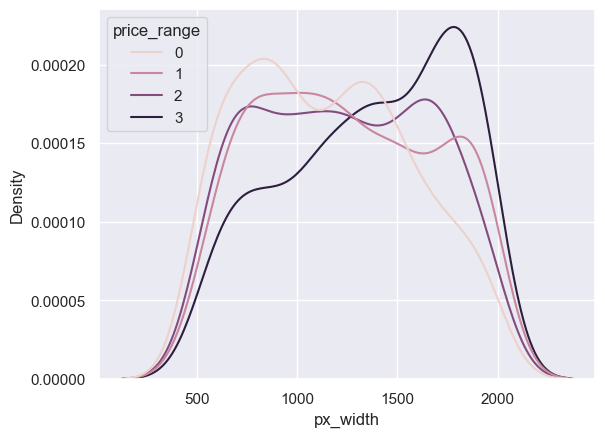

In [29]:
# px_width
sns.kdeplot(data, x='px_width', hue='price_range')

#### Insight:
- There is a continuous increase pixel width as we move from low cost to high cost.  

<Axes: xlabel='px_height', ylabel='Density'>

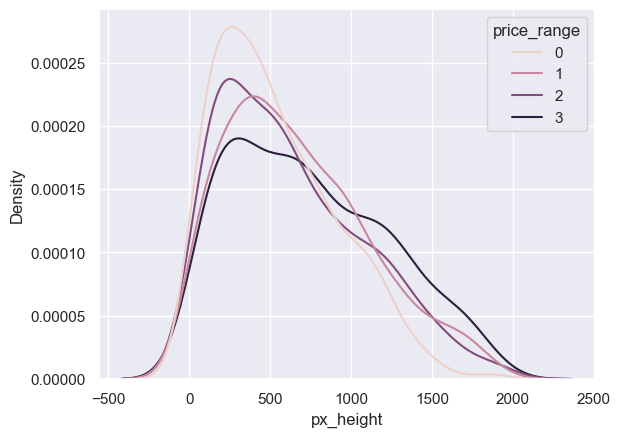

In [30]:
# pixel height
sns.kdeplot(data, x='px_height', hue='price_range')

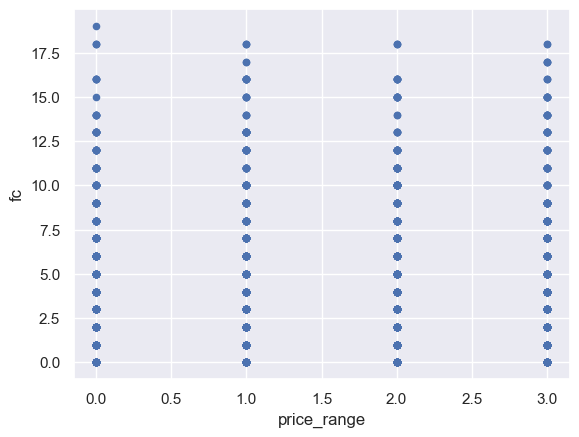

In [31]:
# front camera mega pixels
data.plot(x='price_range',y='fc',kind='scatter')
plt.show()

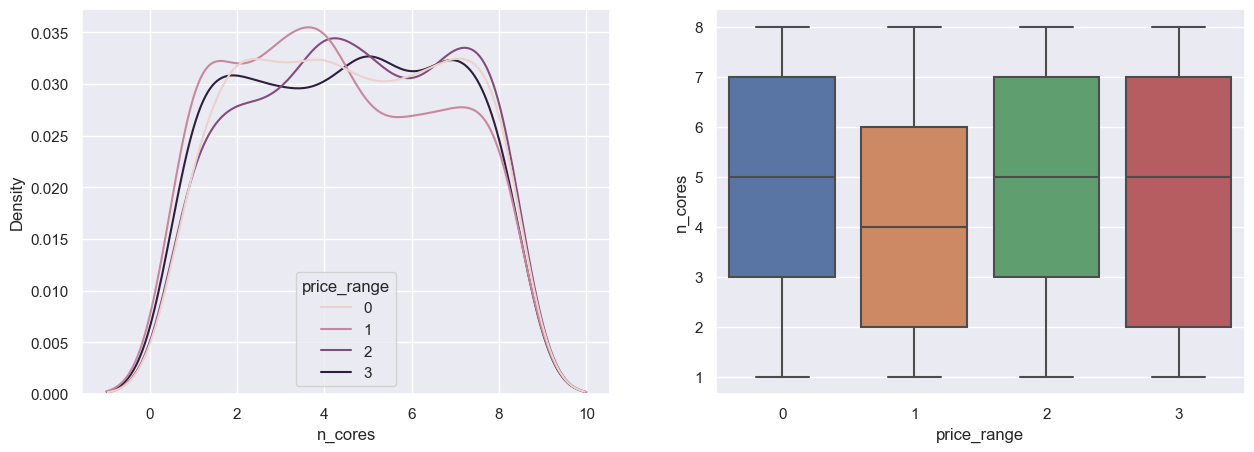

In [32]:
# Primary camera Megapixels
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data, x='price_range', y='n_cores', ax=axs[1])
plt.show()

#### Insight:
- Primary camera megapixels are showing a little variation along the target categories.

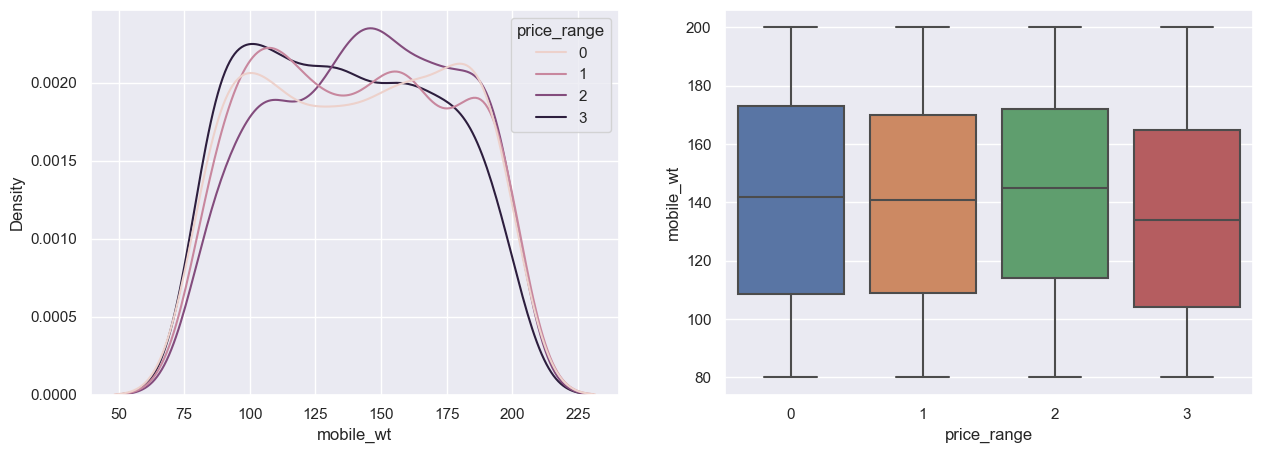

In [33]:
# mobile weight
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

#### Insight:
- We can see that when the price of the mobile increases, the weight of the mobile decreases.

# Elbow method
- The elbow method is a heuristic used to determine the optimal number of clusters k in a K-means clustering algorithm.
- It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters k.

In [34]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=5,random_state=10)
Kmeans.fit(x)

KMeans(n_clusters=5, random_state=10)

In [35]:
labels = Kmeans.labels_
Kmeans.cluster_centers_

array([[1.22090586e+03, 5.18828452e-01, 1.52133891e+00, 5.14644351e-01,
        4.46652720e+00, 5.41841004e-01, 3.15878661e+01, 4.87447699e-01,
        1.38169456e+02, 4.56485356e+00, 1.02928870e+01, 4.33052301e+02,
        1.04598536e+03, 2.22964854e+03, 1.22154812e+01, 5.86192469e+00,
        1.13389121e+01, 7.90794979e-01, 5.02092050e-01, 5.04184100e-01],
       [1.29016456e+03, 4.62025316e-01, 1.48481013e+00, 5.03164557e-01,
        4.12341772e+00, 5.15822785e-01, 3.17721519e+01, 5.40189873e-01,
        1.41041139e+02, 4.46835443e+00, 9.40189873e+00, 1.11725316e+03,
        1.65503797e+03, 1.34429114e+03, 1.23227848e+01, 5.63607595e+00,
        1.09208861e+01, 7.78481013e-01, 5.15822785e-01, 5.12658228e-01],
       [1.21714716e+03, 4.98327759e-01, 1.57458194e+00, 5.01672241e-01,
        4.44147157e+00, 5.18394649e-01, 3.29832776e+01, 5.01003344e-01,
        1.39240803e+02, 4.62541806e+00, 1.00066890e+01, 1.13986288e+03,
        1.67838462e+03, 3.10137793e+03, 1.29598662e+01, 6.1204

In [36]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i,random_state=15)
    model.fit(x)
    wcss.append(model.inertia_)
wcss

[3508608342.6807494,
 1751624469.5363278,
 1413815748.5079615,
 1245407946.4317226,
 1097801697.888576,
 1001694511.0420724,
 922568600.2995611,
 855841328.7242862,
 802637379.976276,
 755273030.6354029]

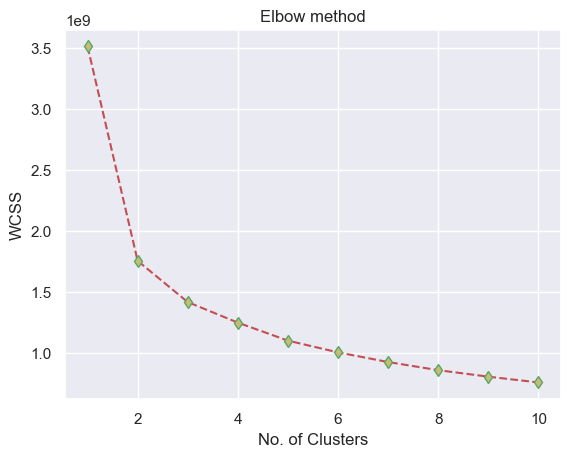

In [37]:
plt.plot(range(1,11),wcss,'d--r',mec='g',mfc='y')
plt.title('Elbow method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

### Silhouette Score
- The silhouette score is a metric used to evaluate the quality of clusters created by clustering algorithms such as K-means.
- A score close to +1 indicates that the data point is well-clustered and far away from neighboring clusters.
- A score close to 0 indicates that the data point is close to the decision boundary between two neighboring clusters.
- A score close to -1 indicates that the data point may have been assigned to the wrong cluster.
In general, a high silhouette score generally indicates dense, well-separated clusters.

In [130]:
# Evaluation
from sklearn.metrics import silhouette_score
silhouette_score(x,labels=Kmeans.labels_)

0.2452301019766801

### Insights:
- The rationale behind the elbow method is that as the number of clusters increases, the WCSS tends to decrease because the data points are more likely to be closer to their cluster centroids.
- The elbow point represents the optimal number of clusters where adding more clusters doesn't significantly improve the clustering quality.

# Screen Size
- There is no screen size mentioned in the dataset.
- So we are defining a variable called as sc_size.
- Usually, we measure the screen size diagonally in inches or cm.
- Here, we are applying Pythagoras theorem to find the diagonal length of the screen using the length and breadth values from the dataset.

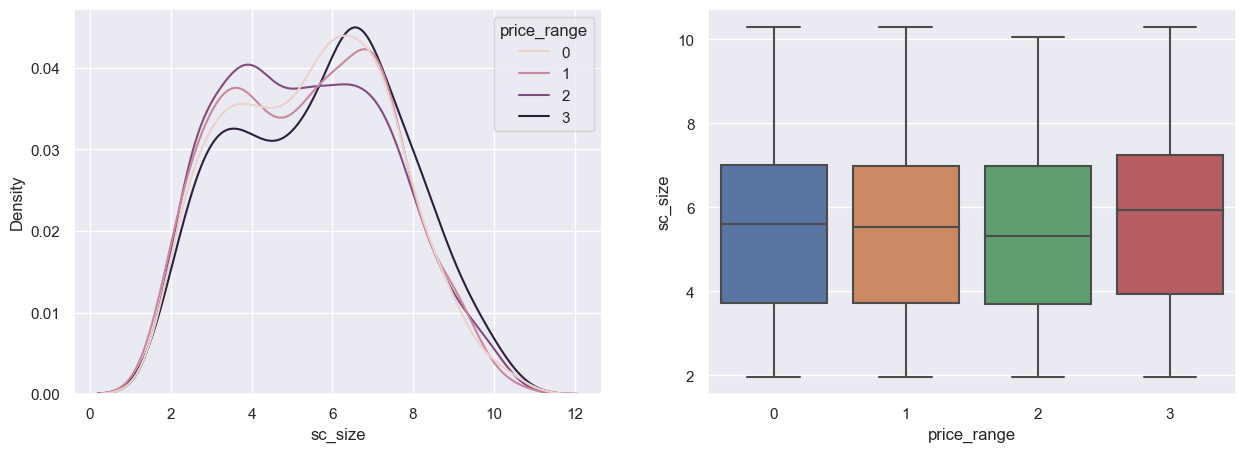

In [38]:
# Defining new variable sc_size
data['sc_size'] = np.sqrt((data['sc_h']**2) + (data['sc_w']**2))
data['sc_size'] = round(data['sc_size']/2.54, 2)
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data, x='sc_size', hue='price_range', ax=axs[0])
sns.boxplot(data, x='price_range', y='sc_size', ax=axs[1])
plt.show()

#### Insight: 
- From the above plot, we can see the Screen Size shows little variation along the target variables. And this can be helpful in predicting the target categories.

### Data Preprocessing 
#### Insights:
* There is no features having the null values

In [39]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
sc_size          0
dtype: int64

### Checking Outliers

<Axes: >

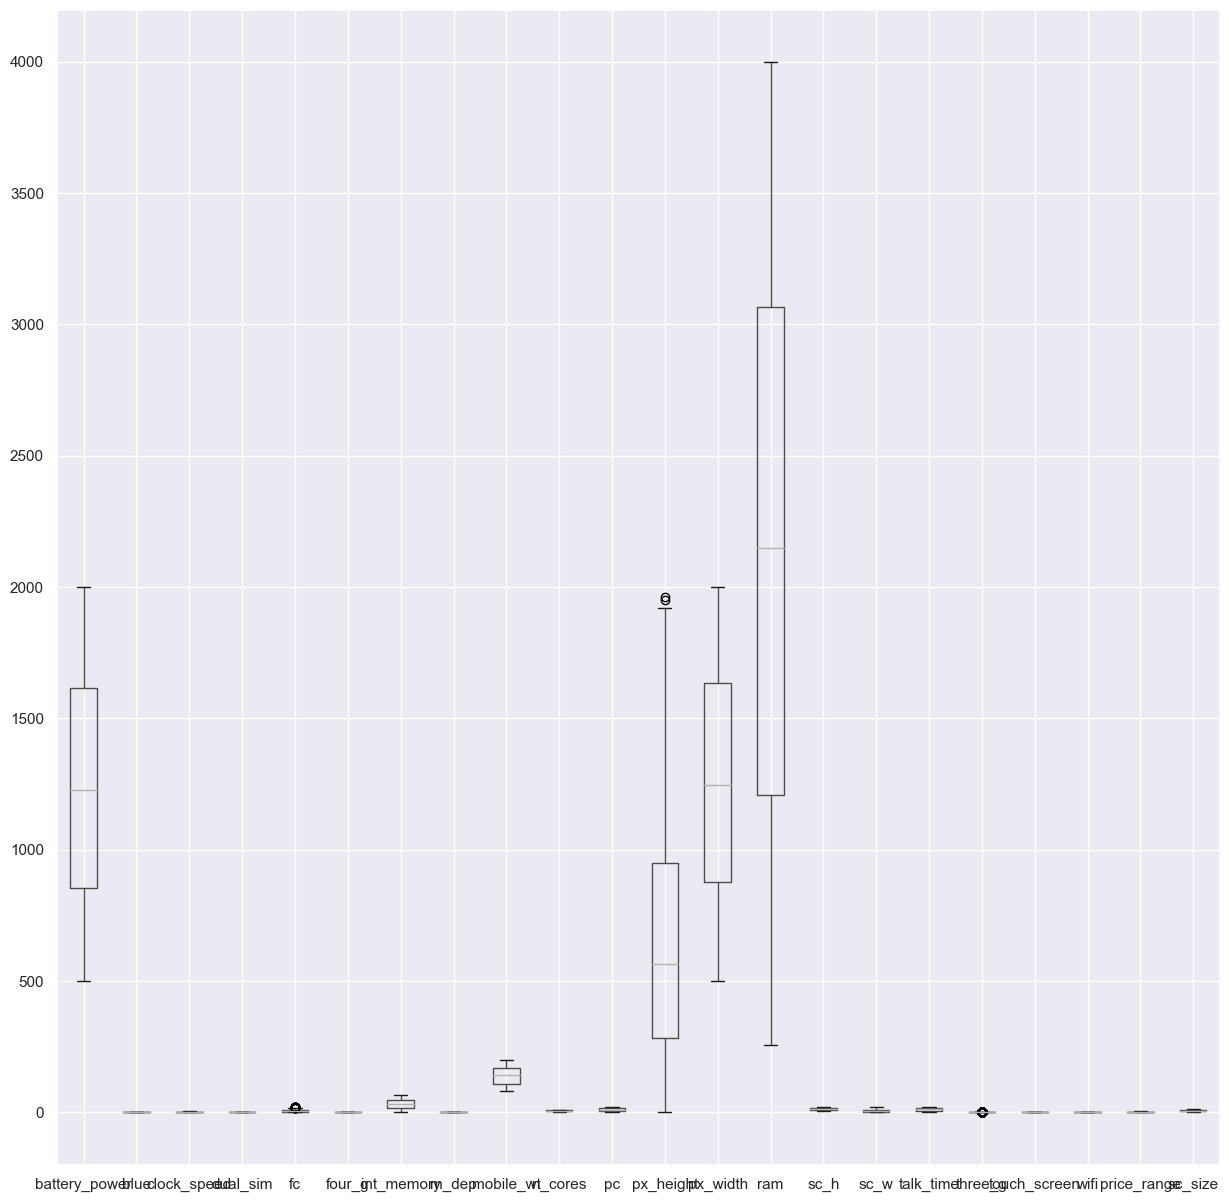

In [40]:
plt.figure(figsize = (15,15))
data.boxplot()

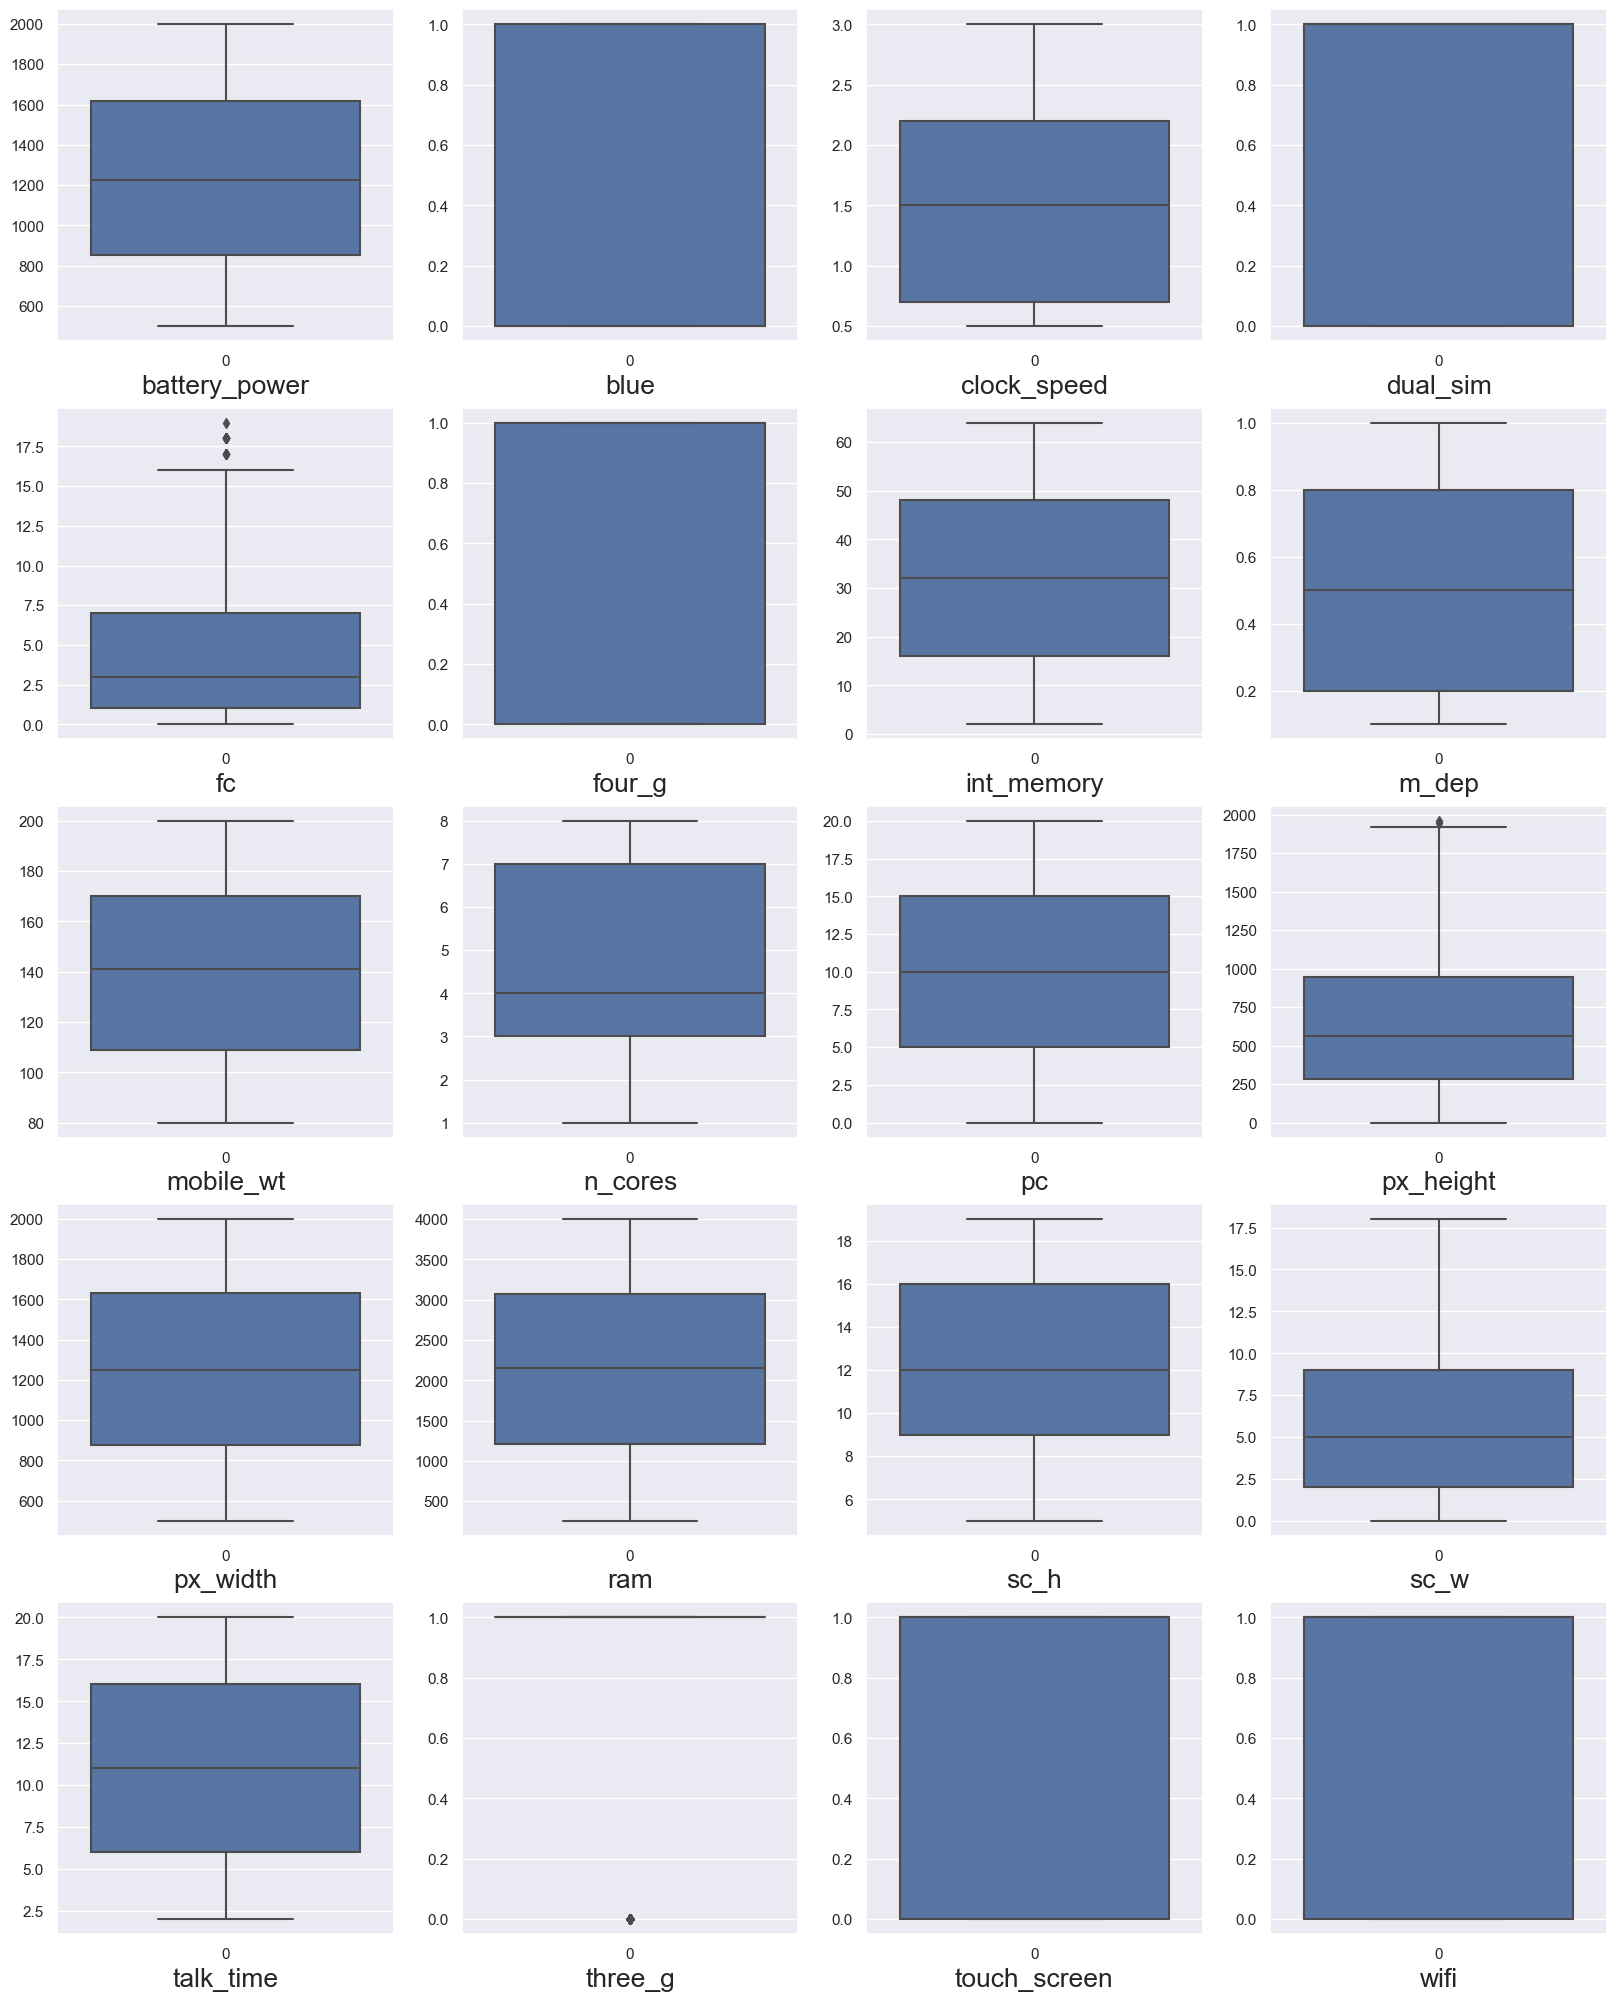

In [41]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber= 1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=19)
    plotnumber+=1
plt.show()

#### Insights:
* There are 3 outliers in fc 
* 1 outlier in three_g
* one outlier in px_height

<Axes: xlabel='px_height'>

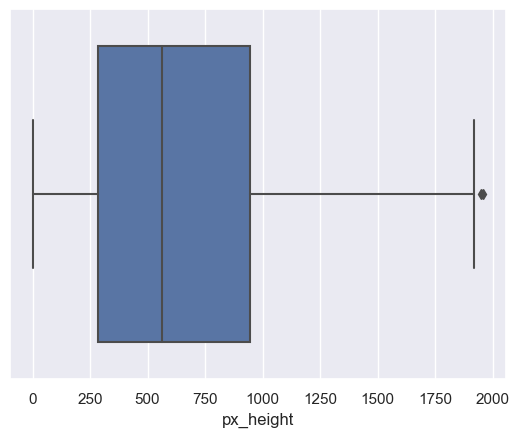

In [42]:
sns.boxplot(data=data,x='px_height')

<Axes: xlabel='three_g'>

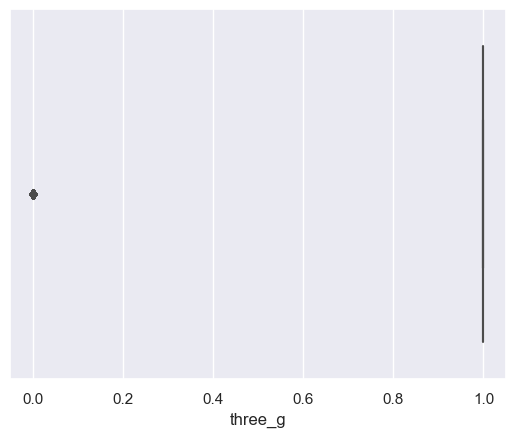

In [43]:
sns.boxplot(data=data,x='three_g')

<Axes: xlabel='fc'>

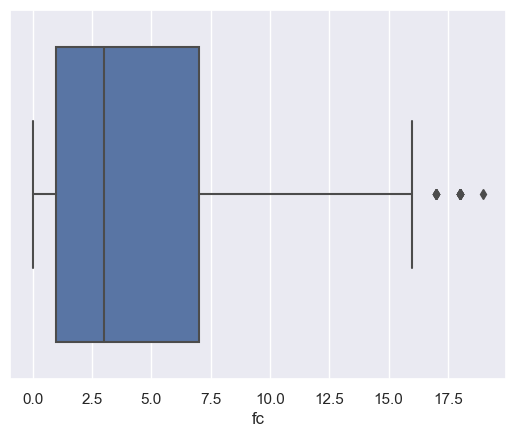

In [44]:
sns.boxplot(data=data,x='fc')

# Outlier Treatment
- Now, we found that there are outliers in fc, three_g, and px_height.
- We'll need to treat those outliers using Inter Quartile Range (IQR).

In [45]:
# Outlier tratement in 3G
IQR = stats.iqr(data.three_g,interpolation='midpoint')
IQR

0.0

In [46]:
Q1=data.three_g.quantile(0.25)
Q3=data.three_g.quantile(0.75)
min_limit=Q1-1.5*(IQR)
max_limit=Q3+1.5*(IQR)
print(min_limit,max_limit)

1.0 1.0


In [47]:
data.loc[data['three_g']<min_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,4.49
10,769,1,2.9,1,0,0,9,0.1,182,5,...,874,3946,5,2,7,0,0,0,3,2.12
19,682,1,0.5,0,4,0,19,1.0,121,4,...,1064,2337,11,1,18,0,1,1,1,4.35
22,1949,0,2.6,1,4,0,47,0.3,199,4,...,822,1433,11,5,20,0,0,1,1,4.76
30,1579,1,0.5,1,0,0,5,0.2,88,7,...,1739,3532,17,11,12,0,0,1,3,7.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1454,0,2.6,0,8,0,6,0.4,199,3,...,1018,1300,10,0,2,0,0,1,1,3.94
1982,1784,0,1.6,0,4,0,41,0.4,164,6,...,1437,2313,14,1,11,0,1,0,2,5.53
1983,1262,0,1.8,1,12,0,34,0.1,149,5,...,737,3248,13,3,4,0,1,1,2,5.25
1988,1547,1,2.9,0,2,0,57,0.4,114,1,...,957,1620,9,2,19,0,1,1,1,3.63


In [48]:
data.loc[data['three_g']>max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size


In [49]:
data.loc[data['three_g']<min_limit,'three_g']=np.median(data.three_g)

In [50]:
data.loc[data['three_g']<min_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size


<Axes: xlabel='three_g'>

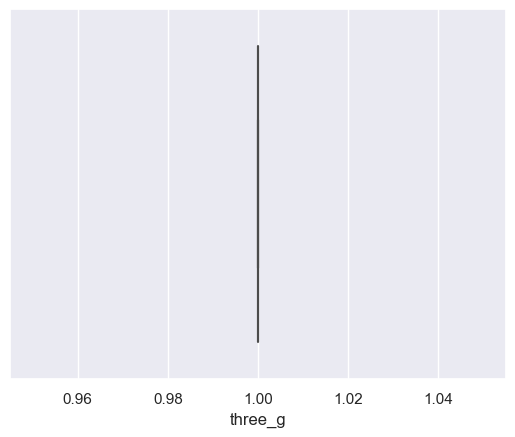

In [51]:
sns.boxplot(data=data,x='three_g')

In [52]:
# fc outlier treatment
IQR = stats.iqr(data.fc,interpolation='midpoint')
IQR

6.0

In [53]:
Q1=data.fc.quantile(0.25)
Q3=data.fc.quantile(0.75)
min_limit=Q1-1.5*(IQR)
max_limit=Q3+1.5*(IQR)
print(min_limit,max_limit)

-8.0 16.0


In [54]:
data.loc[data['fc']<min_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size


In [55]:
data.loc[data['fc']>max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size
95,1137,1,1.0,0,18,0,7,1.0,196,3,...,1179,3616,13,5,12,1,1,1,3,5.48
169,1569,0,2.8,1,17,0,44,0.3,110,4,...,1942,1260,9,2,17,1,0,0,1,3.63
226,1708,1,2.4,1,18,1,49,0.1,109,1,...,517,3388,6,4,16,1,1,1,3,2.84
229,1689,0,1.8,0,17,0,24,0.3,127,3,...,1200,2766,7,2,7,1,1,1,3,2.87
300,1937,1,1.7,0,17,0,58,0.6,189,1,...,1767,3321,5,4,14,1,1,0,3,2.52
305,1348,0,2.0,0,18,0,52,0.3,98,3,...,1942,955,18,11,7,1,1,1,1,8.31
372,1703,1,1.5,1,17,1,55,0.7,138,5,...,1711,2993,5,1,20,1,1,1,3,2.01
584,946,1,2.6,1,17,0,5,0.1,166,3,...,1771,3720,15,7,4,1,1,0,3,6.52
1387,1533,1,1.1,1,18,1,17,0.3,160,4,...,1393,2520,8,2,11,1,0,1,2,3.25
1406,1731,1,2.3,1,18,0,60,0.5,171,4,...,1039,1220,9,3,20,1,1,0,1,3.73


In [56]:
data.loc[data['fc']>max_limit,'fc']=np.median(data.fc)
data.loc[data['fc']>max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size


<Axes: xlabel='fc'>

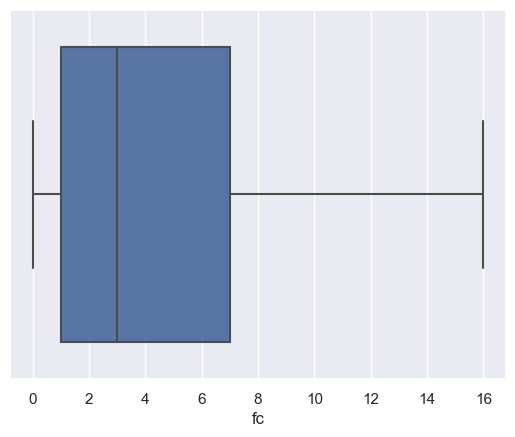

In [57]:
sns.boxplot(data=data,x='fc')

In [58]:
#px_height outlier treatment
IQR = stats.iqr(data.px_height,interpolation='midpoint')
IQR

665.0

In [59]:
Q1 = data.px_height.quantile(0.25)
Q3 = data.px_height.quantile(0.75)
min_limit = Q1-1.5*(IQR)
max_limit = Q3+1.5*(IQR)
print(min_limit,max_limit)

-714.75 1944.75


In [60]:
data.loc[data['px_height']<min_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size


In [61]:
data.loc[data['px_height']>max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size
988,1413,1,0.5,1,4,1,45,0.4,104,5,...,1994,2973,17,8,15,1,0,1,3,7.40
1771,1230,1,1.6,0,0,1,48,0.7,111,7,...,1963,1622,18,17,16,1,1,1,2,9.75


In [62]:
data.loc[data['px_height']>max_limit,'px_height']=np.median(data.px_height)
data.loc[data['px_height']>max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size


<Axes: xlabel='px_height'>

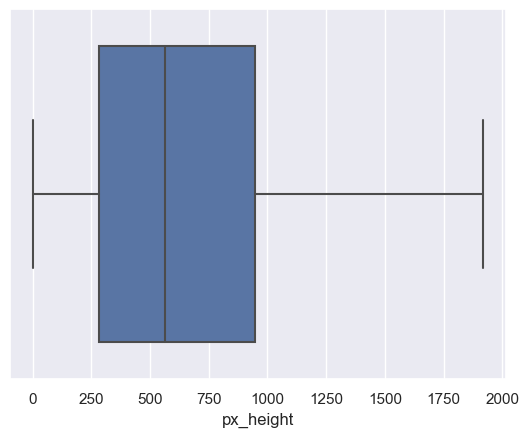

In [63]:
sns.boxplot(data=data,x='px_height')

# Checking correlation after treating outliers
- It is recommended to check correlation after treating outliers to get a more accurate representation of the data.

<Axes: >

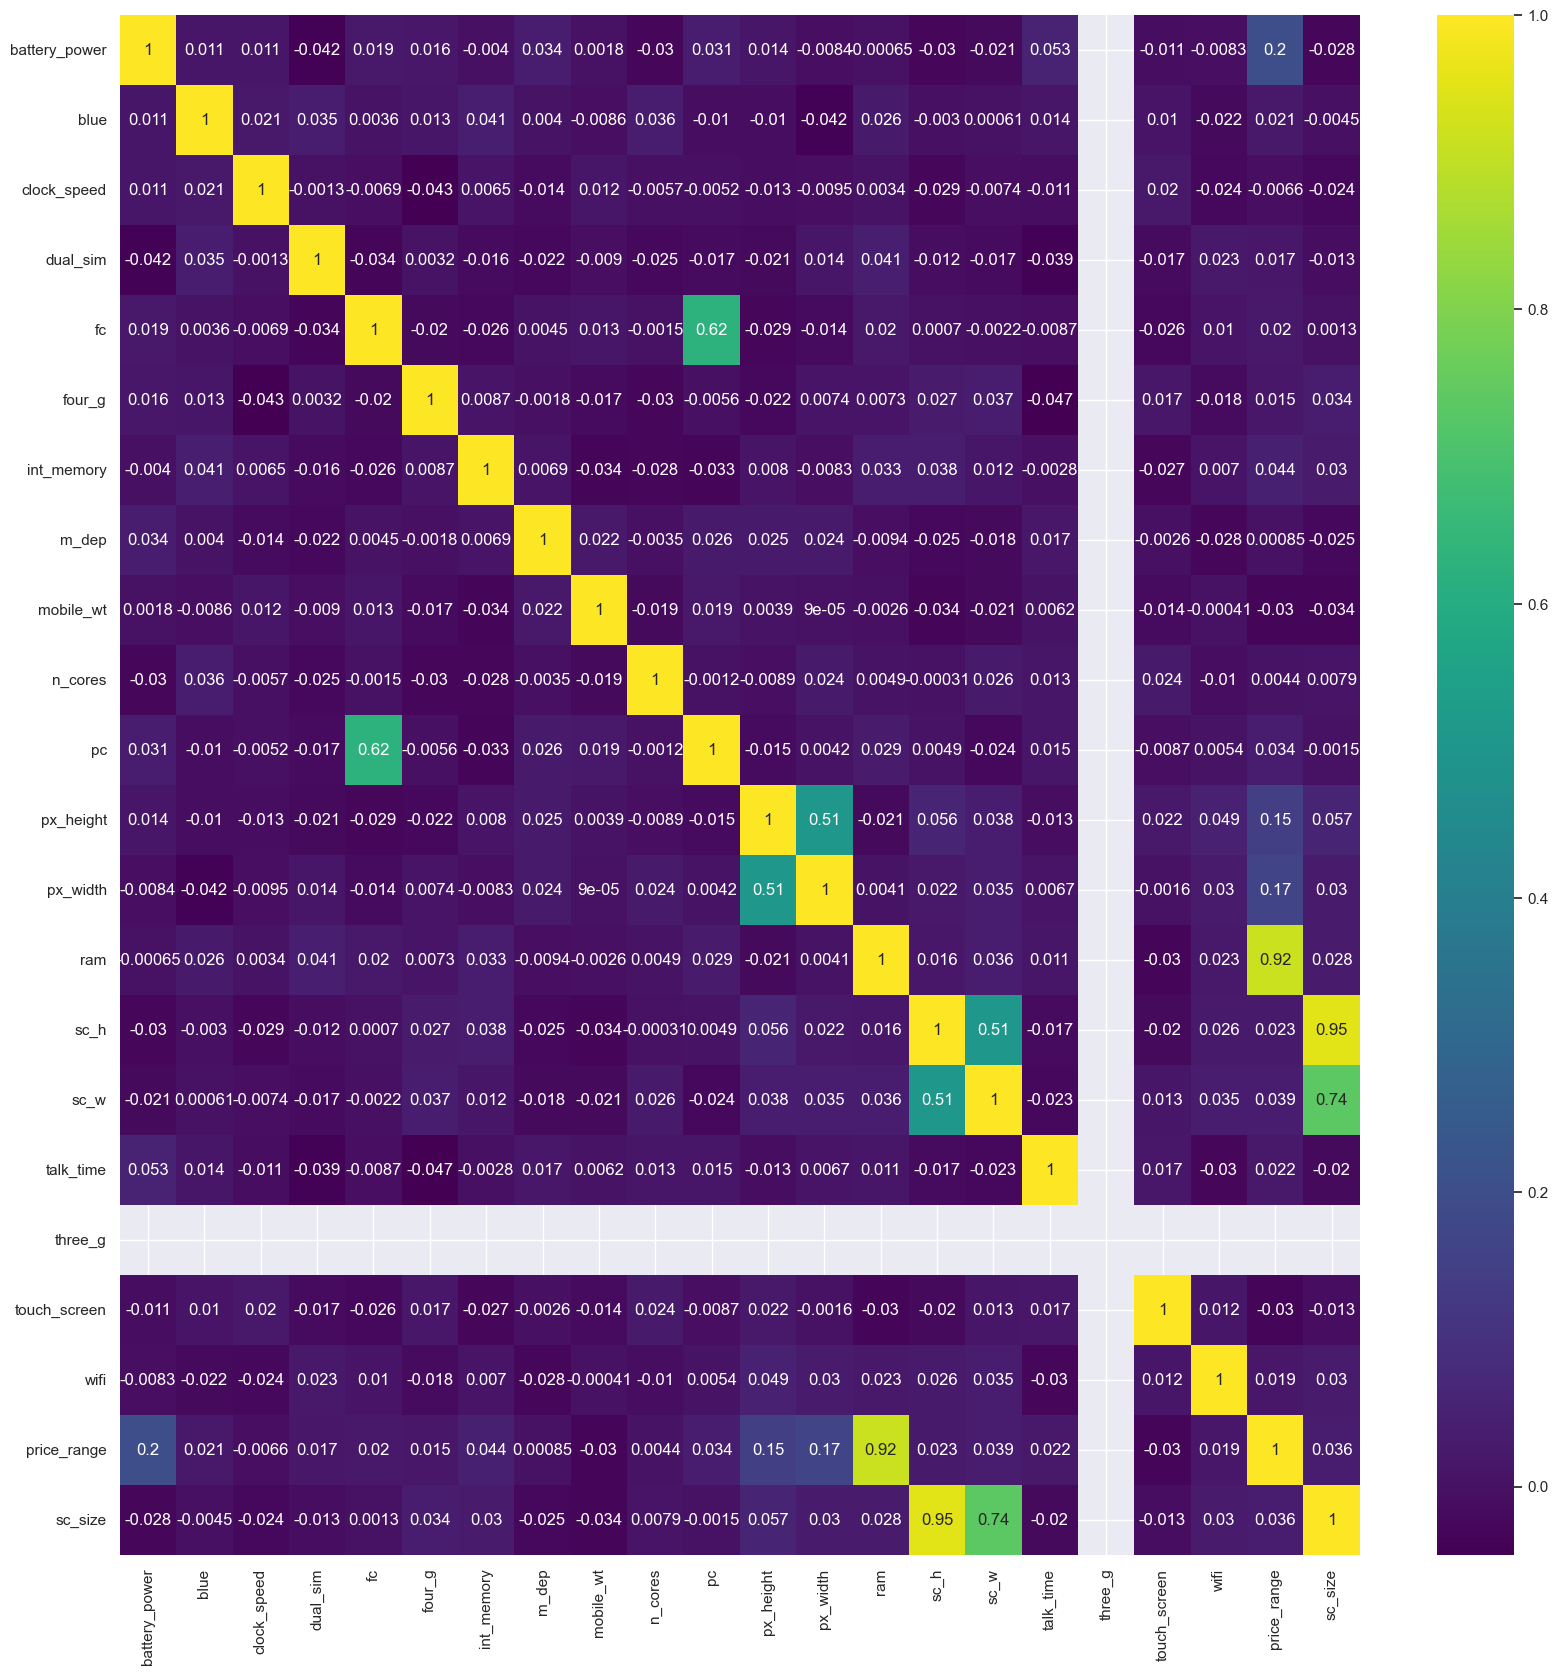

In [64]:
#checking the corelation 
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap='viridis',annot=True)

#### Insights:
* Here pc vs fc have high correlation

In [65]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size
battery_power,1.000000,0.011252,0.011482,-0.041847,0.018896,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,NaN,-0.010516,-0.008343,0.200723,-0.028296
blue,0.011252,1.000000,0.021419,0.035198,0.003560,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.041533,0.026351,-0.002952,0.000613,0.013934,NaN,0.010061,-0.021863,0.020573,-0.004503
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.006880,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,NaN,0.019756,-0.024471,-0.006606,-0.023705
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.033595,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,0.014291,0.041072,-0.011949,-0.016666,-0.039404,NaN,-0.017117,0.022740,0.017444,-0.012682
fc,0.018896,0.003560,-0.006880,-0.033595,1.000000,-0.019929,-0.025671,0.004464,0.013453,-0.001489,...,-0.014033,0.019830,0.000701,-0.002200,-0.008712,NaN,-0.025563,0.010491,0.020479,0.001268
four_g,0.015665,0.013443,-0.043073,0.003187,-0.019929,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,0.007448,0.007313,0.027166,0.037005,-0.046628,NaN,0.016758,-0.017620,0.014772,0.034207
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.025671,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,-0.008335,0.032813,0.037771,0.011731,-0.002790,NaN,-0.026999,0.006993,0.044435,0.029915
m_dep,0.034085,0.004049,-0.014364,-0.022142,0.004464,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.023566,-0.009434,-0.025348,-0.018388,0.017003,NaN,-0.002638,-0.028353,0.000853,-0.024654
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.013453,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000090,-0.002581,-0.033855,-0.020761,0.006209,NaN,-0.014368,-0.000409,-0.030302,-0.033821
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.001489,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,0.024480,0.004868,-0.000315,0.025826,0.013148,NaN,0.023774,-0.009964,0.004399,0.007878


#### Insights:
* price_range having good relation with battery_power and also with ram

In [66]:
# data.drop(['fc'],axis=1, inplace=True) #already deleted fc

In [67]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,1,0,1,1,4.49
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,6.80
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,4.40
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,7.04
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,5.35
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,5.85
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,3.57
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,8.11


In [68]:
# Traning the model
x = data.drop(columns = ['price_range']) # we are dropping the data since it is an independant variable
y = data['price_range'] #dependant variable 
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [69]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,sc_size
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,1,0,1,4.49
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,6.80
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,4.40
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,7.04
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,5.35
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,5.85
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3.57
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,8.11


### MinMaxScaler
- MinMaxScaler scales the data such that it falls within a specified range, typically between 0 and 1.
- This scaling method is useful when you have features with varying ranges and you want to normalize them to a common scale.

In [70]:
# Normalizing the date using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [71]:
x_scaled.shape # Shape of the scaled data using MinMaxScaler

(2000, 21)

In [72]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 42)

In [73]:
x_train.shape

(1600, 21)

In [74]:
y_train.shape

(1600,)

In [75]:
x_test.shape

(400, 21)

In [76]:
y_test.shape

(400,)

# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [78]:
y_pred = LR.predict(x_test)
y_pred

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 2, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 1, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 3, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 3, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 2, 0, 2, 2, 3, 3, 3, 1, 0, 0, 2, 2, 2, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 1, 3, 0, 0, 2, 1, 3, 0, 1, 1, 0, 1, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [79]:
y_pred_train = LR.predict(x_train)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       0.92      0.97      0.94        91
           2       0.94      0.85      0.89        92
           3       0.95      0.97      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



<Axes: >

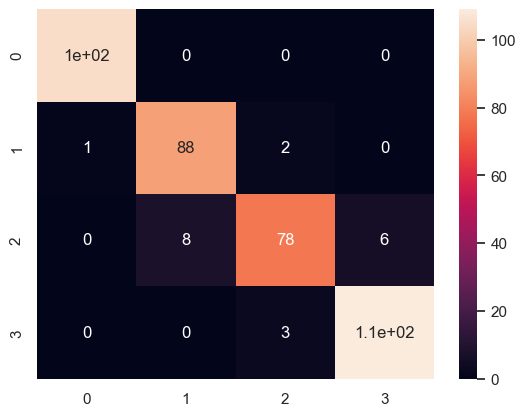

In [81]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [82]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       395
           1       0.91      0.90      0.90       409
           2       0.93      0.89      0.91       408
           3       0.95      0.97      0.96       388

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



In [83]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy*100,'%')

Accuracy: 95.0 %


# Decision Tree

In [84]:
# Balancing the data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE()
print(Counter(y))
x_sm, y_sm = sm.fit_resample(x,y)
print(Counter(y_sm))

Counter({1: 500, 2: 500, 3: 500, 0: 500})
Counter({1: 500, 2: 500, 3: 500, 0: 500})


In [85]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [86]:
DTC_Predict = DTC.predict(x_test)
DTC_Pred_Train = DTC.predict(x_train)

In [87]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
acc = accuracy_score(y_train, DTC_Pred_Train) # accuaracy score for trained data
acc

1.0

In [88]:
acc_test = accuracy_score(y_test, DTC_Predict)
acc_test # accuracy score for test data

0.8425

In [89]:
print(classification_report(y_test, DTC_Predict))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       105
           1       0.76      0.85      0.80        91
           2       0.80      0.72      0.75        92
           3       0.87      0.91      0.89       112

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



In [90]:
pd.crosstab(y_test, DTC_Predict)

col_0,0,1,2,3
price_range,,,,
0,92,13,0,0
1,7,77,7,0
2,0,11,66,15
3,0,0,10,102


[[ 92  13   0   0]
 [  7  77   7   0]
 [  0  11  66  15]
 [  0   0  10 102]]


<Axes: >

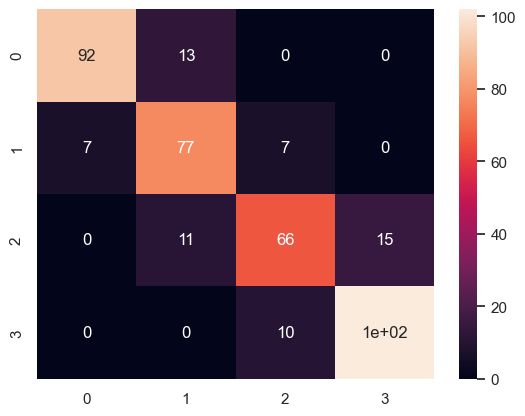

In [91]:
cf_matrix = confusion_matrix(y_test, DTC_Predict)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

In [92]:
accuracy = accuracy_score(y_test, DTC_Predict)
print("Accuracy of Decision Tree Classifier:",accuracy*100,'%')

Accuracy of Decision Tree Classifier: 84.25 %


# Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf_cf = RandomForestClassifier(n_estimators = 300)
rf_cf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [94]:
y_predict = rf_cf.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.86      0.82      0.84        91
           2       0.79      0.84      0.81        92
           3       0.93      0.90      0.91       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [95]:
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy of Random Forest Classifier:",accuracy*100,'%')

Accuracy of Random Forest Classifier: 88.25 %


# XGBoost

In [96]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 5, learning_rate=0.1)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [97]:
XGBClassifier(max_depth=5, objective='multi:softprob')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [98]:
# Prediction

y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.85      0.93      0.89        91
           2       0.87      0.85      0.86        92
           3       0.94      0.90      0.92       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



In [99]:
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy of XGB:",accuracy*100,'%')

Accuracy of XGB: 90.5 %


### GridSearchCV
- GridSearchCV is used for cross validation

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
# Cross validation
grid = GridSearchCV(xgb, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.856 total time=   0.0s
[CV 2/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.831 total time=   0.0s
[CV 3/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.850 total time=   0.0s
[CV 4/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.897 total time=   0.0s
[CV 5/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5

[CV 1/5; 9/120] END gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.878 total time=   0.0s
[CV 2/5; 9/120] START gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8
[CV 2/5; 9/120] END gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.872 total time=   0.0s
[CV 3/5; 9/120] START gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8
[CV 3/5; 9/120] END gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.881 total time=   0.0s
[CV 4/5; 9/120] START gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8
[CV 4/5; 9/120] END gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.841 total time=   0.0s
[CV 5/5; 9/120] START gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8
[CV 5/5; 9/120] END gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.887 total tim

[CV 3/5; 16/120] END gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3;, score=0.859 total time=   0.1s
[CV 4/5; 16/120] START gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3
[CV 4/5; 16/120] END gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3;, score=0.881 total time=   0.1s
[CV 5/5; 16/120] START gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3
[CV 5/5; 16/120] END gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3;, score=0.887 total time=   0.1s
[CV 1/5; 17/120] START gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.5
[CV 1/5; 17/120] END gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.5;, score=0.903 total time=   0.1s
[CV 2/5; 17/120] START gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.5
[CV 2/5; 17/120] END gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=

[CV 5/5; 23/120] END gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.5;, score=0.922 total time=   0.1s
[CV 1/5; 24/120] START gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8
[CV 1/5; 24/120] END gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8;, score=0.900 total time=   0.1s
[CV 2/5; 24/120] START gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8
[CV 2/5; 24/120] END gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8;, score=0.903 total time=   0.1s
[CV 3/5; 24/120] START gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8
[CV 3/5; 24/120] END gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8;, score=0.887 total time=   0.1s
[CV 4/5; 24/120] START gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8
[CV 4/5; 24/120] END gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, s

[CV 1/5; 32/120] END gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5;, score=0.866 total time=   0.0s
[CV 2/5; 32/120] START gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5
[CV 2/5; 32/120] END gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5;, score=0.869 total time=   0.0s
[CV 3/5; 32/120] START gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5
[CV 3/5; 32/120] END gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5;, score=0.878 total time=   0.0s
[CV 4/5; 32/120] START gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5
[CV 4/5; 32/120] END gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5;, score=0.831 total time=   0.0s
[CV 5/5; 32/120] START gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5
[CV 5/5; 32/120] END gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=

[CV 3/5; 39/120] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.8;, score=0.853 total time=   0.0s
[CV 4/5; 39/120] START gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.8
[CV 4/5; 39/120] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.8;, score=0.847 total time=   0.0s
[CV 5/5; 39/120] START gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.8
[CV 5/5; 39/120] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.8;, score=0.850 total time=   0.0s
[CV 1/5; 40/120] START gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.3
[CV 1/5; 40/120] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.3;, score=0.863 total time=   0.3s
[CV 2/5; 40/120] START gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.3
[CV 2/5; 40/120] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsam

[CV 4/5; 46/120] END gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.3;, score=0.834 total time=   0.4s
[CV 5/5; 46/120] START gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.3
[CV 5/5; 46/120] END gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.3;, score=0.869 total time=   0.4s
[CV 1/5; 47/120] START gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5
[CV 1/5; 47/120] END gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5;, score=0.875 total time=   0.5s
[CV 2/5; 47/120] START gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5
[CV 2/5; 47/120] END gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5;, score=0.878 total time=   0.5s
[CV 3/5; 47/120] START gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5
[CV 3/5; 47/120] END gamma=1.5, learning_rate=0.01, max_depth=10, n_estimato

[CV 5/5; 53/120] END gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.5;, score=0.850 total time=   0.4s
[CV 1/5; 54/120] START gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8
[CV 1/5; 54/120] END gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8;, score=0.859 total time=   0.4s
[CV 2/5; 54/120] START gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8
[CV 2/5; 54/120] END gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.4s
[CV 3/5; 54/120] START gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8
[CV 3/5; 54/120] END gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.4s
[CV 4/5; 54/120] START gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8
[CV 4/5; 54/120] END gamma=1.5, learning_rate=0.001, max_depth=5, n_estimato

[CV 4/5; 62/120] END gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.5;, score=0.831 total time=   0.0s
[CV 5/5; 62/120] START gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.5
[CV 5/5; 62/120] END gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.5;, score=0.884 total time=   0.0s
[CV 1/5; 63/120] START gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.8
[CV 1/5; 63/120] END gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.8;, score=0.847 total time=   0.0s
[CV 2/5; 63/120] START gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.8
[CV 2/5; 63/120] END gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.8;, score=0.903 total time=   0.0s
[CV 3/5; 63/120] START gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.8
[CV 3/5; 63/120] END gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.8;, score=0.856 total tim

[CV 1/5; 70/120] END gamma=1.8, learning_rate=1, max_depth=10, n_estimators=200, subsample=0.3;, score=0.853 total time=   0.1s
[CV 2/5; 70/120] START gamma=1.8, learning_rate=1, max_depth=10, n_estimators=200, subsample=0.3
[CV 2/5; 70/120] END gamma=1.8, learning_rate=1, max_depth=10, n_estimators=200, subsample=0.3;, score=0.884 total time=   0.1s
[CV 3/5; 70/120] START gamma=1.8, learning_rate=1, max_depth=10, n_estimators=200, subsample=0.3
[CV 3/5; 70/120] END gamma=1.8, learning_rate=1, max_depth=10, n_estimators=200, subsample=0.3;, score=0.863 total time=   0.1s
[CV 4/5; 70/120] START gamma=1.8, learning_rate=1, max_depth=10, n_estimators=200, subsample=0.3
[CV 4/5; 70/120] END gamma=1.8, learning_rate=1, max_depth=10, n_estimators=200, subsample=0.3;, score=0.869 total time=   0.1s
[CV 5/5; 70/120] START gamma=1.8, learning_rate=1, max_depth=10, n_estimators=200, subsample=0.3
[CV 5/5; 70/120] END gamma=1.8, learning_rate=1, max_depth=10, n_estimators=200, subsample=0.3;, sco

[CV 4/5; 77/120] END gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.5;, score=0.872 total time=   0.1s
[CV 5/5; 77/120] START gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.5
[CV 5/5; 77/120] END gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.5;, score=0.900 total time=   0.1s
[CV 1/5; 78/120] START gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.8
[CV 1/5; 78/120] END gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.8;, score=0.900 total time=   0.1s
[CV 2/5; 78/120] START gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.8
[CV 2/5; 78/120] END gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.8;, score=0.912 total time=   0.1s
[CV 3/5; 78/120] START gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.8
[CV 3/5; 78/120] END gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=

[CV 5/5; 84/120] END gamma=1.8, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8;, score=0.894 total time=   0.1s
[CV 1/5; 85/120] START gamma=1.8, learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 85/120] END gamma=1.8, learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.859 total time=   0.0s
[CV 2/5; 85/120] START gamma=1.8, learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 85/120] END gamma=1.8, learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.869 total time=   0.0s
[CV 3/5; 85/120] START gamma=1.8, learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 85/120] END gamma=1.8, learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.831 total time=   0.0s
[CV 4/5; 85/120] START gamma=1.8, learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 85/120] END gamma=1.8, learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.3;, s

[CV 1/5; 93/120] END gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.863 total time=   0.0s
[CV 2/5; 93/120] START gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.8
[CV 2/5; 93/120] END gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.872 total time=   0.0s
[CV 3/5; 93/120] START gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.8
[CV 3/5; 93/120] END gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.866 total time=   0.0s
[CV 4/5; 93/120] START gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.8
[CV 4/5; 93/120] END gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.844 total time=   0.0s
[CV 5/5; 93/120] START gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.8
[CV 5/5; 93/120] END gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=

[CV 2/5; 100/120] END gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.3;, score=0.863 total time=   0.4s
[CV 3/5; 100/120] START gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.3
[CV 3/5; 100/120] END gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.3;, score=0.847 total time=   0.4s
[CV 4/5; 100/120] START gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.3
[CV 4/5; 100/120] END gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.3;, score=0.838 total time=   0.4s
[CV 5/5; 100/120] START gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.3
[CV 5/5; 100/120] END gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.3;, score=0.856 total time=   0.4s
[CV 1/5; 101/120] START gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.5
[CV 1/5; 101/120] END gamma=1.8, learning_rate=0.01, max_depth=5, n_estimato

[CV 3/5; 107/120] END gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5;, score=0.875 total time=   0.6s
[CV 4/5; 107/120] START gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5
[CV 4/5; 107/120] END gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5;, score=0.853 total time=   0.5s
[CV 5/5; 107/120] START gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5
[CV 5/5; 107/120] END gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5;, score=0.881 total time=   0.6s
[CV 1/5; 108/120] START gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8
[CV 1/5; 108/120] END gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8;, score=0.894 total time=   0.6s
[CV 2/5; 108/120] START gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8
[CV 2/5; 108/120] END gamma=1.8, learning_rate=0.01, max_depth=10, n

[CV 4/5; 114/120] END gamma=1.8, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8;, score=0.838 total time=   0.5s
[CV 5/5; 114/120] START gamma=1.8, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8
[CV 5/5; 114/120] END gamma=1.8, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.5s
[CV 1/5; 115/120] START gamma=1.8, learning_rate=0.001, max_depth=10, n_estimators=10, subsample=0.3
[CV 1/5; 115/120] END gamma=1.8, learning_rate=0.001, max_depth=10, n_estimators=10, subsample=0.3;, score=0.844 total time=   0.0s
[CV 2/5; 115/120] START gamma=1.8, learning_rate=0.001, max_depth=10, n_estimators=10, subsample=0.3
[CV 2/5; 115/120] END gamma=1.8, learning_rate=0.001, max_depth=10, n_estimators=10, subsample=0.3;, score=0.869 total time=   0.0s
[CV 3/5; 115/120] START gamma=1.8, learning_rate=0.001, max_depth=10, n_estimators=10, subsample=0.3
[CV 3/5; 115/120] END gamma=1.8, learning_rate=0.001, max_depth=10, 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy', verbose=10)

In [102]:
# Prediction

y_pred_train = grid.predict(x_train)
y_pred_test = grid.predict(x_test)

# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for tuned XGBoost(Test set)= ')
print(score)

Classification Report for tuned XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.86      0.92      0.89        91
           2       0.86      0.84      0.85        92
           3       0.95      0.90      0.93       112

    accuracy                           0.91       400
   macro avg       0.90      0.91      0.90       400
weighted avg       0.91      0.91      0.91       400



In [103]:
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:",accuracy*100,'%')

Accuracy: 90.75 %


In [104]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

[[101   4   0   0]
 [  5  84   2   0]
 [  0  10  77   5]
 [  0   0  11 101]]


# SVC
- Support Vector Classification (SVC) is a type of supervised learning algorithm that is used for classification tasks.
- It belongs to the family of Support Vector Machines (SVM), which are popular in machine learning for their effectiveness in handling high-dimensional data and providing good generalization performance.

In [105]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(x_train,y_train)
y_pred3 = svc.predict(x_test)

In [106]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ...................

[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [107]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.01)


In [108]:
grid_pred = grid.predict(x_test)

In [109]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.93      1.00      0.96        91
           2       0.97      0.92      0.94        92
           3       0.98      0.97      0.98       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [110]:
svc.score(x_test,y_test)

0.8725

In [111]:
accuracy = accuracy_score(y_test, grid_pred)
print("Accuracy:",accuracy*100,'%')

Accuracy: 97.0 %


# KNN
- KNN stands for K-Nearest Neighbors, which is a simple and commonly used algorithm for classification and regression tasks in machine learning.
- It is a type of instance-based learning, where the model doesn't explicitly learn a function to make predictions.

#### Two phases of KNN:
- Training phase
- Prediction phase

In [112]:
from sklearn.neighbors import  KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [113]:
# Define the grid of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting method
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

In [114]:
# Define grid search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

In [115]:
# Perform grid search
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [116]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}


In [117]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [118]:
# Get the best model
best_model = grid_search.best_estimator_

In [119]:
y_pred2 = knn.predict(x_test)
y_pred2

array([2, 0, 0, 2, 3, 0, 1, 0, 3, 1, 3, 0, 1, 1, 2, 3, 2, 2, 0, 1, 0, 1,
       0, 1, 0, 3, 2, 2, 1, 0, 2, 0, 2, 1, 0, 3, 2, 1, 3, 0, 0, 1, 0, 2,
       1, 2, 2, 2, 3, 1, 3, 0, 0, 0, 0, 2, 1, 3, 0, 0, 1, 2, 2, 0, 0, 0,
       2, 3, 2, 2, 1, 3, 1, 0, 1, 2, 0, 2, 2, 2, 3, 0, 2, 2, 0, 3, 1, 2,
       1, 0, 0, 3, 3, 2, 3, 1, 2, 3, 1, 1, 2, 0, 2, 0, 1, 3, 2, 0, 0, 1,
       0, 0, 3, 1, 3, 2, 1, 2, 0, 2, 0, 1, 3, 1, 1, 2, 0, 2, 1, 2, 3, 3,
       1, 3, 0, 2, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 3, 1, 1, 1,
       2, 1, 0, 1, 1, 1, 1, 3, 1, 3, 0, 0, 1, 2, 3, 2, 2, 0, 1, 0, 3, 2,
       0, 3, 0, 2, 0, 0, 0, 1, 3, 3, 1, 3, 0, 2, 0, 1, 0, 3, 1, 1, 3, 2,
       1, 2, 2, 1, 0, 3, 3, 1, 0, 2, 0, 2, 0, 2, 2, 1, 3, 2, 0, 2, 0, 1,
       2, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 3, 2, 0, 1, 3, 1, 0, 2, 2,
       2, 3, 0, 2, 1, 1, 2, 3, 2, 0, 1, 3, 2, 2, 1, 3, 2, 2, 2, 0, 2, 1,
       2, 1, 2, 0, 2, 3, 1, 0, 2, 2, 1, 2, 1, 3, 2, 1, 3, 0, 0, 3, 2, 3,
       1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2,

In [120]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57       105
           1       0.31      0.37      0.34        91
           2       0.34      0.42      0.38        92
           3       0.68      0.43      0.52       112

    accuracy                           0.45       400
   macro avg       0.47      0.45      0.45       400
weighted avg       0.49      0.45      0.46       400



In [121]:
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:",accuracy*100,'%')

Accuracy: 45.25 %


# Linear Discriminant Analysis (LDA)
- Linear Discriminant Analysis (LDA) is a statistical technique used for classification and dimensionality reduction.
- It's primary goal is to find the linear combinations of features that best separate multiple classes in a dataset.

#### Why LDA is used?
- Dimensionality Reduction
- Classification
- Feature Extraction
- Data Visualization
- Statistical Analysis

In [122]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,)

In [124]:
lda = LinearDiscriminantAnalysis()

In [125]:
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [126]:
y_pred = lda.predict(x_test)
y_pred

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 1, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 2, 3, 0, 1, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [127]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy*100,'%')

Accuracy: 94.75 %


In [128]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[102   3   0   0]
 [  0  89   2   0]
 [  0   4  87   1]
 [  0   0  11 101]]


# Conclusion

1. From the Exploratory Data Analysis (EDA), we can see that here are mobile phones in 4 price ranges and the elements are almost similar
2. Half devices have Bluetooth facility and half don't.
3. As the price range increases, there is a gradual increase in battery
4. While moving from Low cost to Very high cost, we can find the Ram has continuous increase with price range.
5. Costly phones are lighter
6. RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.
7. From the above experiments, we can conclude that after implementing Support Vector Classification (SVC), we got the best results
8. Linear Discrimant Analysis (LDA) gives the second best results.